<a href="https://colab.research.google.com/github/Bunny00469/Minor-Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 216 µs (started: 2021-06-28 15:09:20 +00:00)


In [3]:
!pip install bing-image-downloader

time: 2.73 s (started: 2021-06-28 15:09:20 +00:00)


In [4]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 117 ms (started: 2021-06-28 15:09:22 +00:00)


In [5]:
from bing_image_downloader import downloader
downloader.download("chair",limit=20,output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/chair


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from http://www.stagecoachdesigns.com/wp-content/uploads/2017/05/true-innovations-simply-comfortable-bonded-leather-executive-chair.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i5.walmartimages.com/asr/fa973f85-b21f-42fb-8554-3293e06fbcf8_1.7e78277616ee510801e28018bf2072e9.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://ebth-com-production.imgix.net/2016/06/08/19/55/34/936/_6061667.jpg?ixlib=rb-1.1.0&amp;w=880&amp;h=880&amp;fit=crop&amp;crop=&amp;auto=format
[%] File Downloaded !

[%] Downloading Image #4 from https://www.costco.co.uk/medias/sys_master/images/hb9/h81/12372228309022.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.costco.co.uk/medias/sys_master/images/hf9/h86/46716339748894.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://3.bp.blogspot.com/-vW2YcDU1eG0/WVRPV114K0I/AAA

In [6]:
downloader.download("bed",limit=20,output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/bed


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://www.roomservice360.com/pub/media/catalog/product/t/r/true-bed-02.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cassoni.com/image/catalog/Bonaldo/Beds/bon-true_bed-01-img-01.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.gomodern.co.uk/images/product/GM-TRUE-01-1-large_1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cassoni.com/image/catalog/Bonaldo/Beds/bon-true_bed-02-img-01.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cassoni.com/image/catalog/Bonaldo/Beds/bon-true_bed-01-img-02.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.bonaldo.ca/wp-content/uploads/2015/07/bonaldo-true-bed_6-1024x731.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://cdn.1stopbedrooms.com/media/catalog/product/cache/1/image/cc0ec2d91bc4dd8becc1b9167d5c2be1/k

In [7]:
import numpy as np
import os
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['chair','bed']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 26.1 s (started: 2021-06-28 15:10:14 +00:00)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.2,random_state=69)

time: 76 ms (started: 2021-06-28 15:10:40 +00:00)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 22.8 s (started: 2021-06-28 15:10:40 +00:00)


In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.57 ms (started: 2021-06-28 15:11:03 +00:00)


In [20]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))
model = pickle.load(open('img_model.p','rb'))

time: 27.7 ms (started: 2021-06-28 15:18:59 +00:00)


Enter your URL:https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1yOD1QdizOfKXfOC3mysOL09p7YjMer0PAg&usqp=CAU
(224, 225, 3)
 PREDICTED OUTPUT: chair


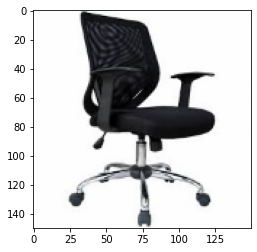

time: 3.22 s (started: 2021-06-28 15:19:24 +00:00)


In [22]:
flat_data = []
url = input('Enter your URL:')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

# New Section